In [9]:
#21BEC2292
#Vikalp Shukla
#Vellore Campus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('/content/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Convert 'quality' to categorical labels
bins = [0, 4, 6, 10]
labels = ['Poor', 'Average', 'Good']
data['quality'] = pd.cut(data['quality'], bins=bins, labels=labels)

In [12]:
label_encoder_quality = LabelEncoder()
data['quality_encoded'] = label_encoder_quality.fit_transform(data['quality'])
data.drop('quality', axis=1, inplace=True)

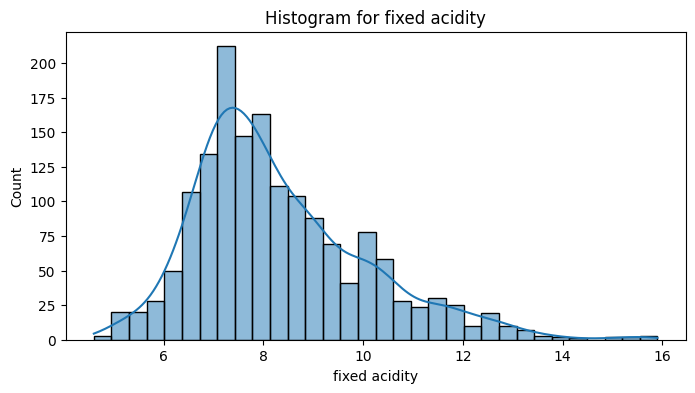

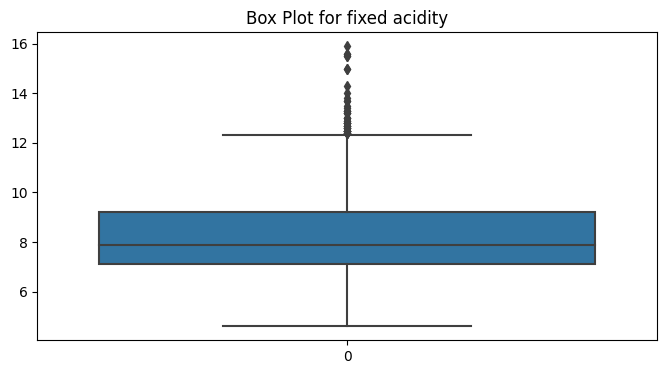

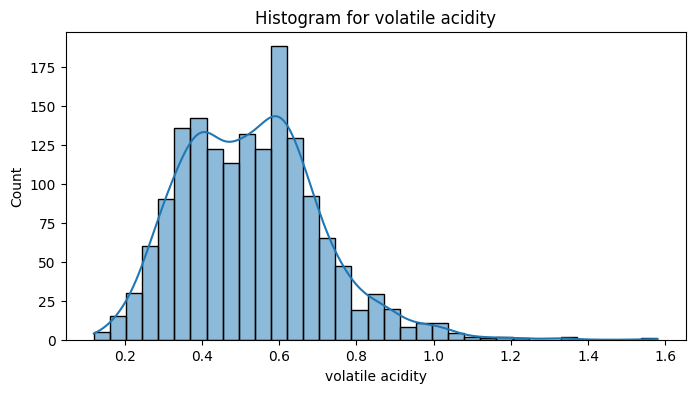

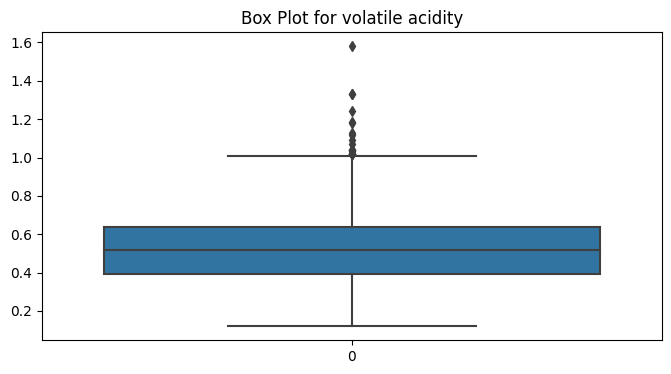

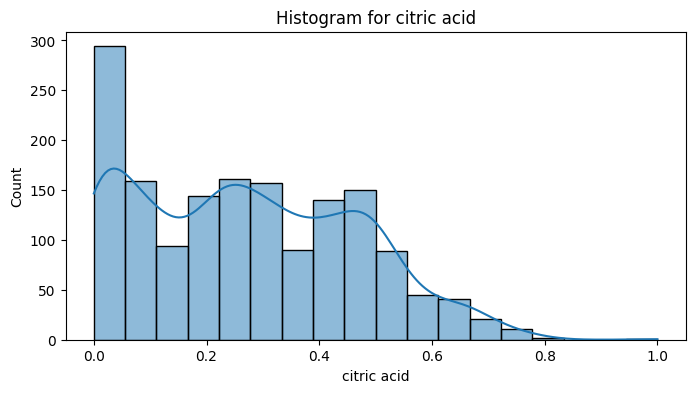

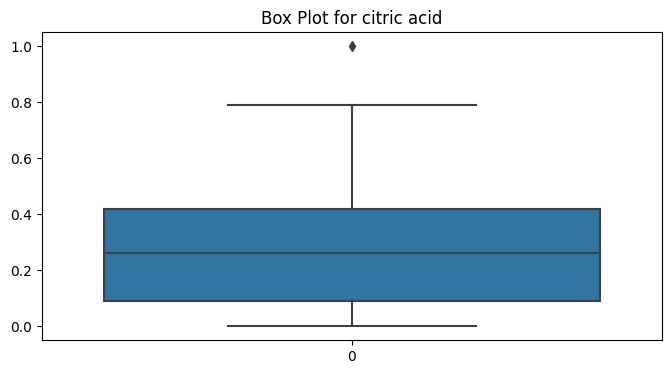

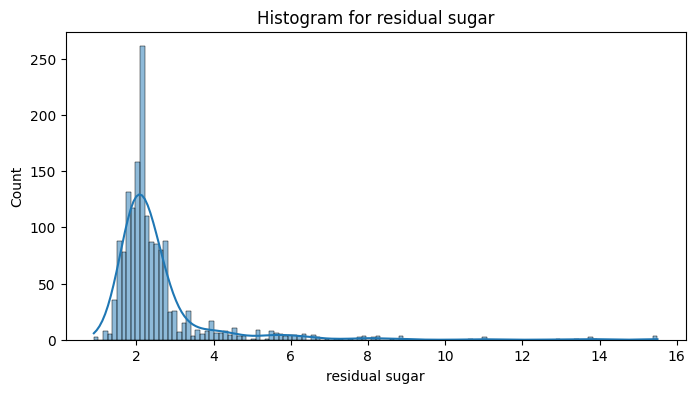

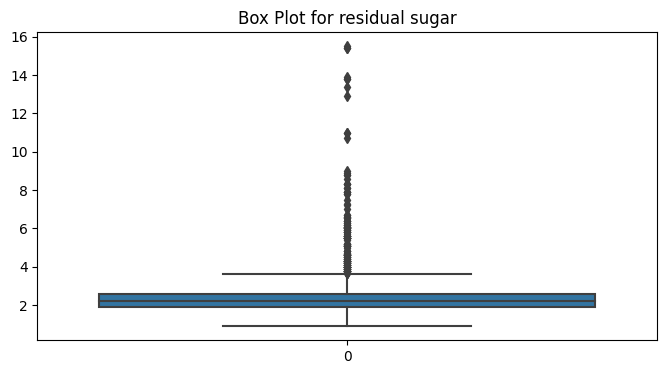

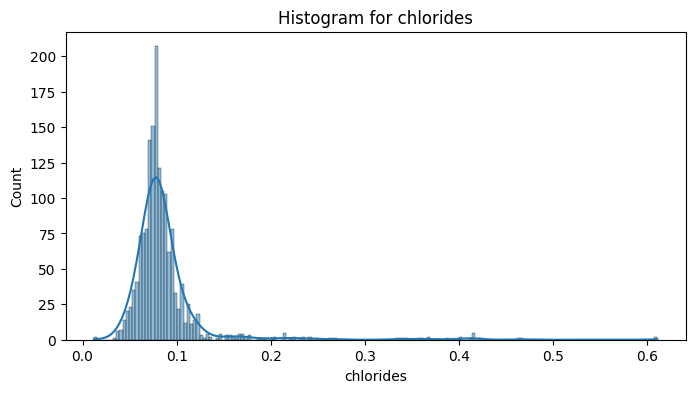

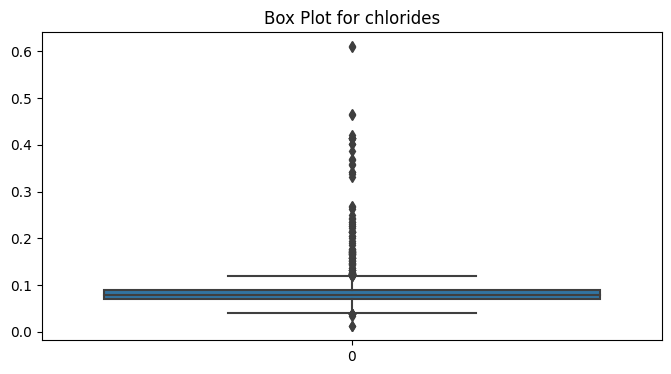

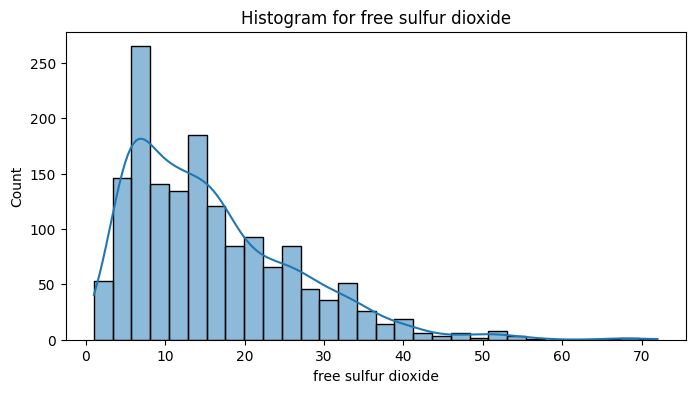

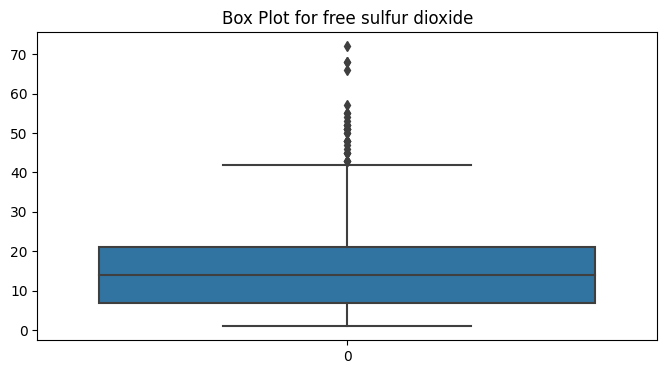

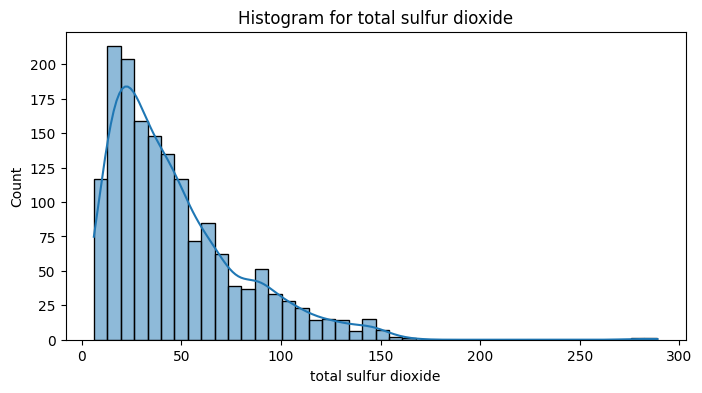

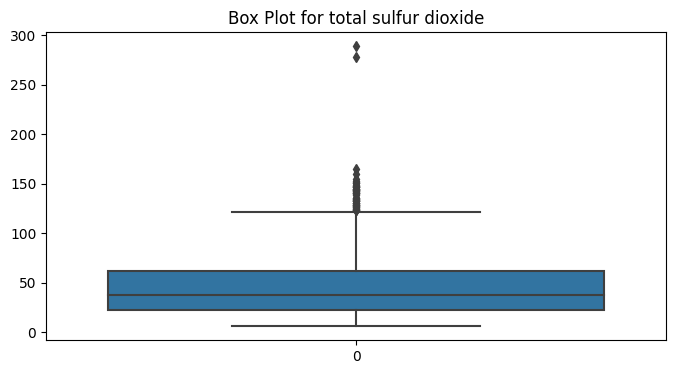

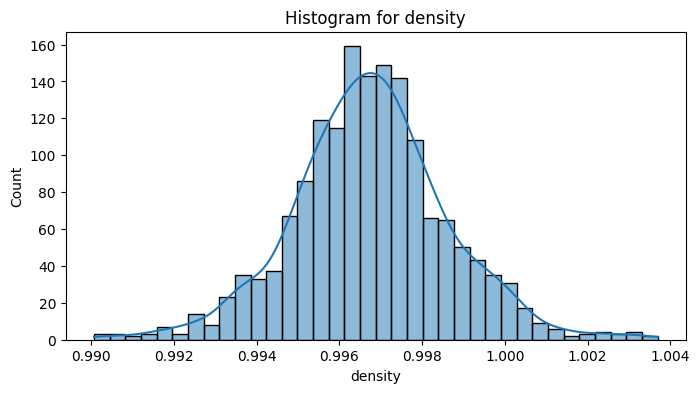

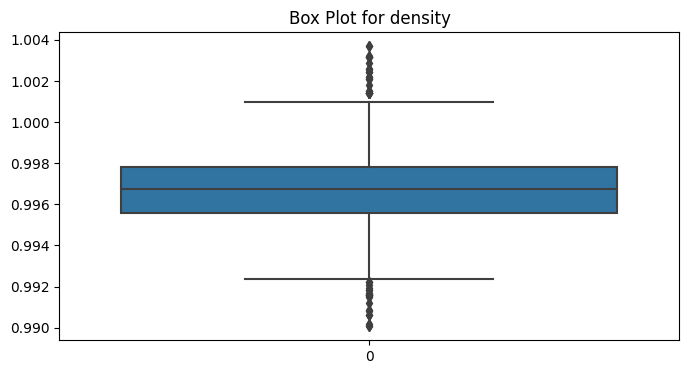

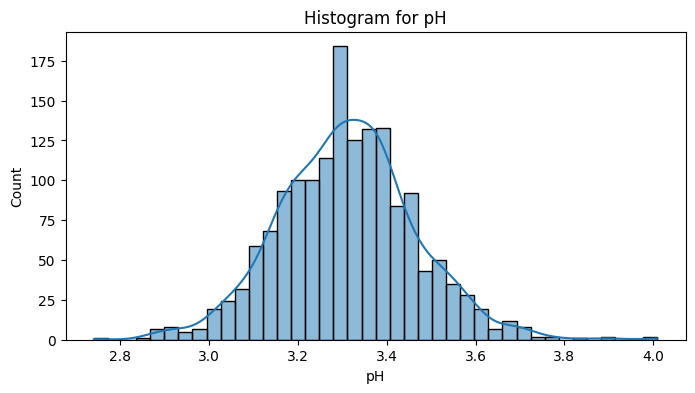

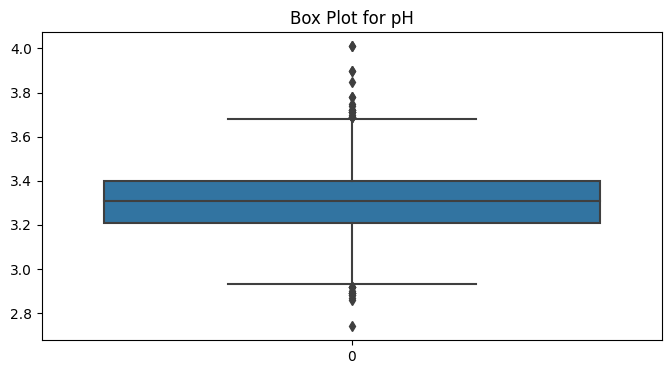

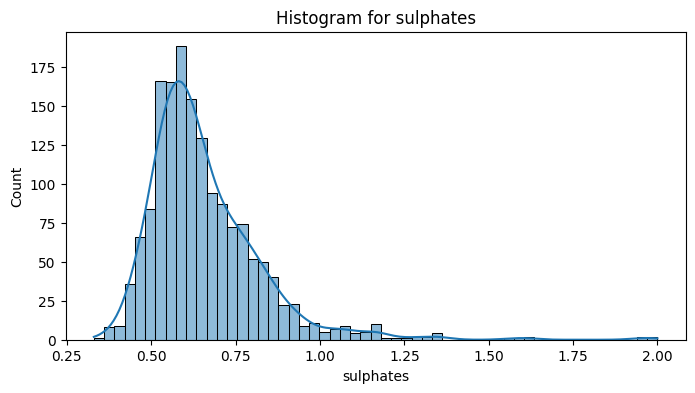

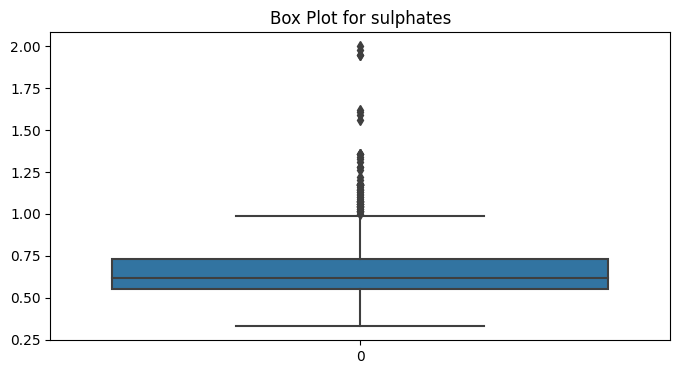

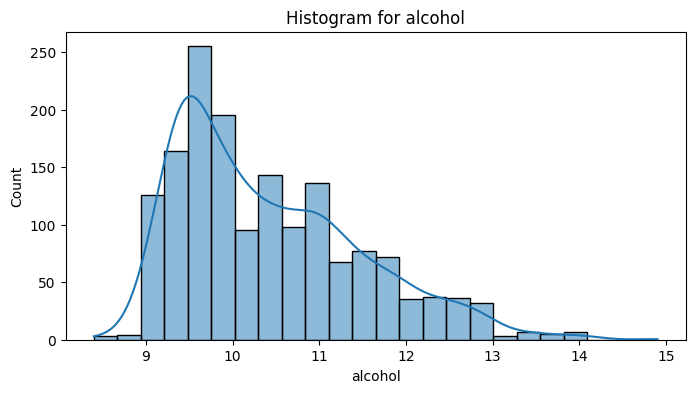

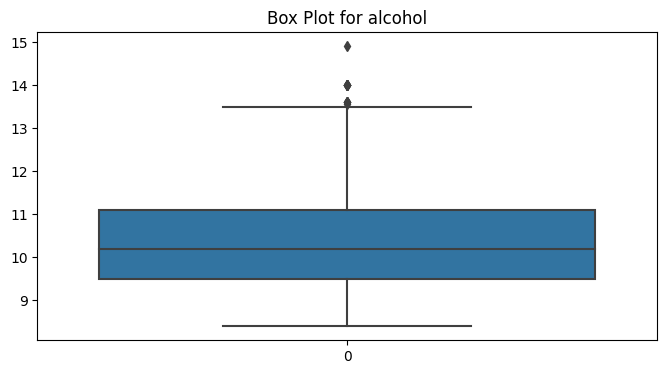

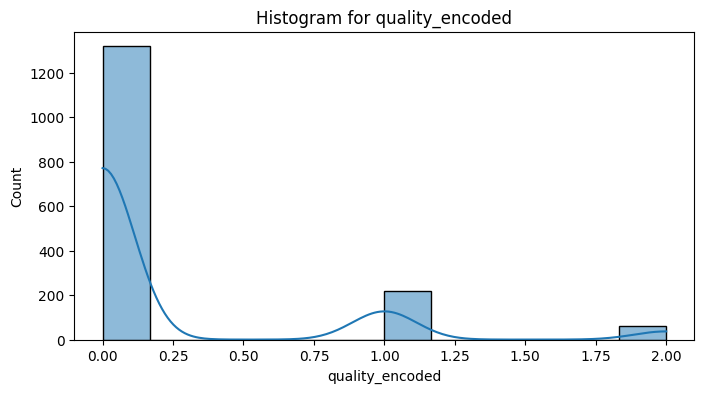

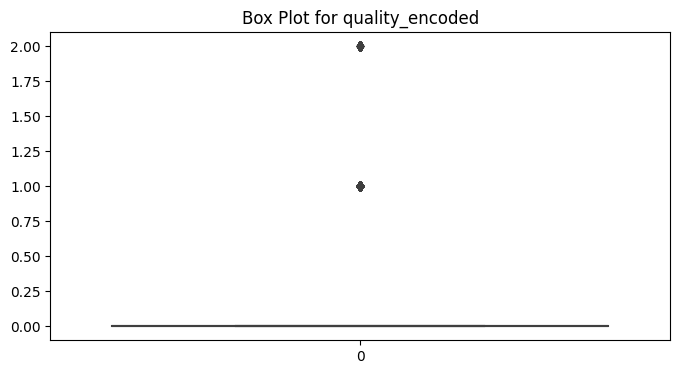

In [14]:
# Data Preprocessing
columns_to_preprocess = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                         'pH', 'sulphates', 'alcohol', 'quality_encoded']

# Handle missing values (if any)
data[columns_to_preprocess] = data[columns_to_preprocess].fillna(data[columns_to_preprocess].median())

# Visualization (histograms and box plots) for selected columns
for col in columns_to_preprocess:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [17]:
# Outlier detection and treatment (assuming 1.5*IQR method) for selected columns
for col in columns_to_preprocess:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])
    data[col] = np.where(data[col] < lower_limit, lower_limit, data[col])

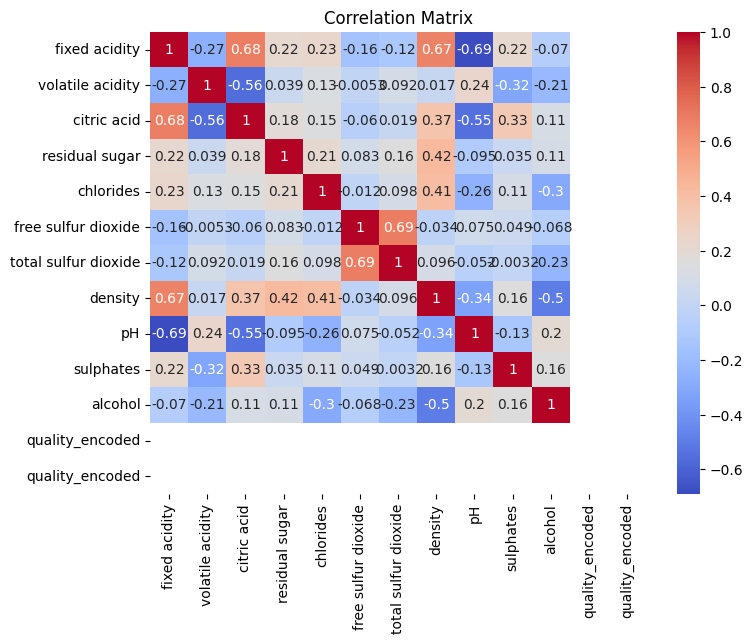

In [18]:
# Check the correlation of selected independent variables with the target
correlation_matrix = data[columns_to_preprocess + ['quality_encoded']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Split the data into dependent and independent variables
X = data[columns_to_preprocess]  # Features
y = data['quality_encoded']  # Target

In [22]:
# Scaling the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

In [27]:
# Build the machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=10, random_state=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=10)

In [28]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate accuracy in percentage
accuracy_percentage = accuracy * 100

print("Model Accuracy:", accuracy_percentage)
print("Classification Report:\n", classification_rep)

Model Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [30]:
# Test with random observations
test_data = pd.DataFrame({
    'fixed acidity': [7.0, 7.5, 8.2],
    'volatile acidity': [0.6, 0.4, 0.5],
    'citric acid': [0.1, 0.3, 0.2],
    'residual sugar': [2.0, 1.8, 1.9],
    'chlorides': [0.08, 0.07, 0.075],
    'free sulfur dioxide': [15, 20, 18],
    'total sulfur dioxide': [40, 50, 45],
    'density': [0.995, 0.996, 0.997],
    'pH': [3.5, 3.6, 3.4],
    'sulphates': [0.6, 0.65, 0.62],
    'alcohol': [10.5, 11.0, 11.2],
    'quality': ['Average', 'Good', 'Average']
})
test_data['quality_encoded'] = label_encoder_quality.transform(test_data['quality'])
test_data.drop('quality', axis=1, inplace=True)
test_data_scaled = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns)
test_predictions = model.predict(test_data_scaled)
print("Test Predictions:")
print(test_predictions)

Test Predictions:
[0. 0. 0.]
